In [1]:
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Find and Seperate Paths

In [2]:
# load trained dynamics models
dynamics_model_dir = "d3rlpy_logs/"
dynamics_model_names_starts_with = "exp_2"

In [3]:
dynamics_model_paths = [filename for filename in os.listdir(dynamics_model_dir) if filename.startswith(dynamics_model_names_starts_with)]

In [4]:
dynamics_model_paths = [dynamics_model_dir + dynamics_model_paths_i for dynamics_model_paths_i in dynamics_model_paths]

In [5]:
dynamics_model_paths.sort()

In [6]:
dynamics_model_paths

['d3rlpy_logs/exp_2_20231013170138',
 'd3rlpy_logs/exp_2_20231013172759',
 'd3rlpy_logs/exp_2_20231013175331',
 'd3rlpy_logs/exp_2_20231013182122',
 'd3rlpy_logs/exp_2_20231013184918',
 'd3rlpy_logs/exp_2_20231013191526',
 'd3rlpy_logs/exp_2_20231013194139',
 'd3rlpy_logs/exp_2_20231013200835',
 'd3rlpy_logs/exp_2_20231013203533',
 'd3rlpy_logs/exp_2_20231013210132']

In [7]:
symmetry_reduced_paths = []
default_paths = []
for dynamics_model_path_i in dynamics_model_paths:
    f = open(dynamics_model_path_i +'/params.json')
    dynamics_model_path_i_params = json.load(f)
    if(dynamics_model_path_i_params["encoder_factory"]['type']=='inverted_pendulum'):
        symmetry_reduced_paths.append(dynamics_model_path_i)
    elif(dynamics_model_path_i_params["encoder_factory"]['type']=='default'):
        default_paths.append(dynamics_model_path_i)

KeyError: 'encoder_factory'

In [10]:
symmetry_reduced_paths = dynamics_model_paths[1::2]
default_paths = dynamics_model_paths[0::2]

In [11]:
default_paths, symmetry_reduced_paths

(['d3rlpy_logs/exp_2_20231013170138',
  'd3rlpy_logs/exp_2_20231013175331',
  'd3rlpy_logs/exp_2_20231013184918',
  'd3rlpy_logs/exp_2_20231013194139',
  'd3rlpy_logs/exp_2_20231013203533'],
 ['d3rlpy_logs/exp_2_20231013172759',
  'd3rlpy_logs/exp_2_20231013182122',
  'd3rlpy_logs/exp_2_20231013191526',
  'd3rlpy_logs/exp_2_20231013200835',
  'd3rlpy_logs/exp_2_20231013210132'])

## Read Data

In [12]:
metric_names =  ["loss", "variance", "observation_error", "reward_error"]
default_data = {metric:[] for metric in metric_names}
default_data['type'] = 'default'
symmetry_reduced_data = {metric:[] for metric in metric_names}
symmetry_reduced_data['type'] = 'symmetry'

for metric_name in metric_names:
    for default_path in default_paths:
        default_data[metric_name].append(np.loadtxt(default_path + '/' + metric_name + ".csv", delimiter=',')[:,1:3])
    default_data[metric_name] = np.array(default_data[metric_name])
    for symmetry_reduced_path in symmetry_reduced_paths:
        symmetry_reduced_data[metric_name].append(np.loadtxt(symmetry_reduced_path + '/' + metric_name + ".csv", delimiter=',')[:,1:3])
    symmetry_reduced_data[metric_name] = np.array(symmetry_reduced_data[metric_name])

## Plot data

In [13]:
def general_plotting(data_array, metric_names):
    for metric_name in metric_names:
        for data_i in data_array:
            x = data_i[metric_name][0, :,0]
            ys = data_i[metric_name][:, :, 1]
            mean=np.mean(ys,axis=0)
            std=np.std(ys,axis=0)
            plt.plot(x, mean, label = data_i['type'])
            plt.fill_between(x, mean-std, mean+std, alpha=0.2)
        plt.ylabel(metric_name)
        plt.xlabel('iterations')
        plt.legend()
        plt.show()

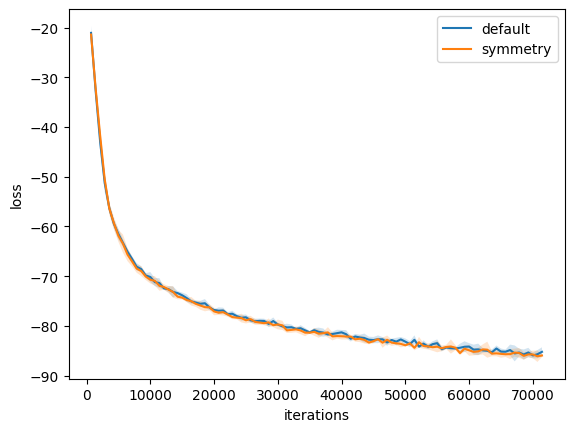

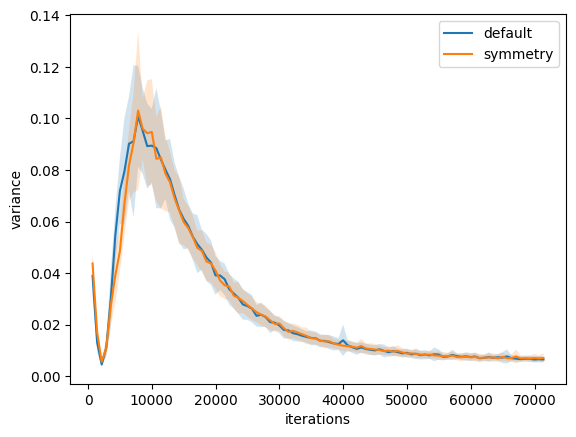

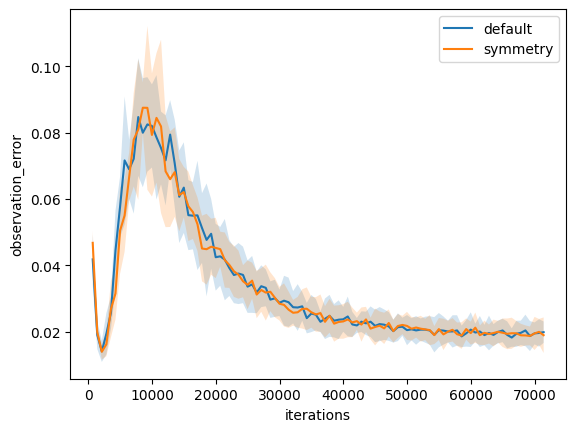

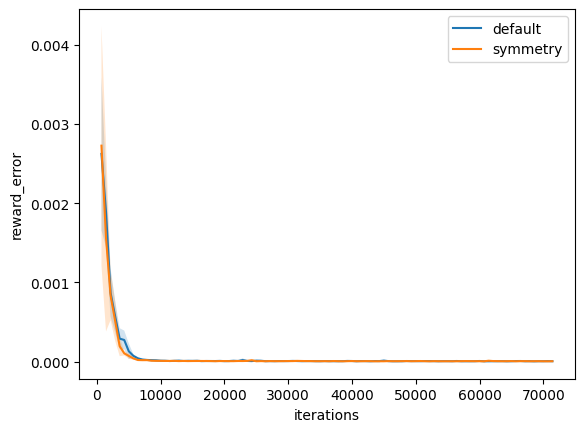

In [14]:
general_plotting([default_data, symmetry_reduced_data], metric_names)

NameError: name 'dataset' is not defined